# Google Store App Rating Prediction (DT RF GB Stacked)

### CONTEXT:
The Play Store apps data has enormous potential to drive app-making businesses to success. However, many apps are being developed every single day and only a few of them become profitable. It is important for developers to be able to predict the success of their app and incorporate features which makes an app successful. We can collect app
data and user ratings from the app stores and use it to extract insightful information. A machine learning model can be used to predict rating for a given app, which can be used to estimate success and scope of improvement. 

### PROJECT OBJECTIVE:
The Goal is to predict the rating for an app based on the given input features like size, number of downloads etc. 

### DATA DESCRIPTION: 
Web scraped data of 10k Play Store apps for analyzing the Android market. Each app (row) has values for category, rating, size, and more. 
1. App: Application name
2. Category: Category the app belongs to
3. Rating: Overall user rating of the app
4. Reviews: Number of user reviews for the app
5. Size: Size of the app
6. Installs: Number of user downloads/installs for the app
7. Type: Paid or Free
8. Price: Price of the app
9. Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
10. Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres. 
11. Last Updated: Date when the app was last updated on Play Store
12. Current Ver: Current version of the app available on Play Store
13. Android Ver: Min required Android version

## 1. Import required libraries and read the data

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clrity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborn library for interactive visualization
#set seaborn plotting aesthetics
sns.set(style='whitegrid')
%matplotlib inline

from scipy import stats

#suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
df = pd.read_csv('Apps_data.csv')

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.70000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.00000,NaN,NaN,NaN,4.19334,0.53743,1.00000,4.00000,4.30000,4.50000,19.00000
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data cleansing and Exploratory data analysis



### Dealing with Duplicate Entries, Unnecessary features and Missing Values

In [7]:
def duplicate_(data):
    NoOfDuplicateRows = data.duplicated().sum()
    if NoOfDuplicateRows == 0:
        print("There are no duplicate records")
        return
    else:
        print("There are ",NoOfDuplicateRows,"duplicate records")

In [8]:
duplicate_(df)

There are  483 duplicate records


In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

The duplicate samples have been removed.

### Renaming a few features names for easy accessibility

In [10]:
df.rename(columns = {'Content Rating':'ContentRating', 'Last Updated':'LastUpdated',
                     'Current Ver':'CurrentVer','Android Ver':'AndroidVer'}, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   App            10358 non-null  object 
 1   Category       10358 non-null  object 
 2   Rating         8893 non-null   float64
 3   Reviews        10358 non-null  object 
 4   Size           10358 non-null  object 
 5   Installs       10358 non-null  object 
 6   Type           10357 non-null  object 
 7   Price          10358 non-null  object 
 8   ContentRating  10357 non-null  object 
 9   Genres         10358 non-null  object 
 10  LastUpdated    10358 non-null  object 
 11  CurrentVer     10350 non-null  object 
 12  AndroidVer     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Missing Values

In [12]:
def missing_data(df):
    missing_data = pd.DataFrame({'net_missing': df.isnull().sum(), '%missing': (df.isnull().sum()/len(df))*100})
    print(missing_data)

missing_data(df)

               net_missing  %missing
App                      0   0.00000
Category                 0   0.00000
Rating                1465  14.14366
Reviews                  0   0.00000
Size                     0   0.00000
Installs                 0   0.00000
Type                     1   0.00965
Price                    0   0.00000
ContentRating            1   0.00965
Genres                   0   0.00000
LastUpdated              0   0.00000
CurrentVer               8   0.07723
AndroidVer               3   0.02896


'Rating','Type','Content Rating','Current Ver','Android Ver'

### Category and Genres

Let's check the classes of these two features. From a preliminary glance, it appears that many of them overlap across the two feature.

In [13]:
df['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

The last class in the list of classes is '1.9', a rather dubious name. Let's check.

In [14]:
df[df.Category == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.00000,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


- This sample needs to be dropped.
- Its Rating is 19. It has the only Null value in ContentRating feature.

In [15]:
df.drop(df[df['Category'] == '1.9'].index, inplace = True)

In [16]:
df['Genres'].value_counts()

Tools                                    842
Entertainment                            588
Education                                527
Business                                 427
Medical                                  408
Productivity                             407
Personalization                          388
Lifestyle                                372
Communication                            366
Sports                                   364
Finance                                  360
Action                                   356
Photography                              322
Health & Fitness                         306
Social                                   280
News & Magazines                         264
Travel & Local                           236
Books & Reference                        230
Shopping                                 224
Arcade                                   218
Simulation                               199
Dating                                   196
Casual    

- There are 33 different classes of 'Category' and 118 different classes of 'Genres'.
- Many classes of 'Genres' have only one member.
- Now, while filling the genres of an app, the uploader of the app might try to click on as many options as possible. In other words, it is representative of the uploader's mind. An expert android developer would be careful of these Genres, whereas newbies might be overzealous about increasing the reach of the app by increasing the number of genres it may belong to. Genres are about going a little deeper (than 'category') nto the functionality of the app in question. It has to do with going deeper into an app's usecase. But this is what we desire. We do not want too many classes at hand. It will give rise to the curse of dimensionality if we choose one-hot-encoding, and unnecessary ranking of the classes if we use Label Encoding. - Now, we are going to employ Decision Tree algorithm (which will overfit more if the number of classes of features is high) and then a league of COMPUTATIONALLY EXPENSIVE ensembling/boosting techniques. We don't have that resources at hand. Also, time is a factor. Because an algorithm should be able to take in LIVE data fed in the form of a stream and process that incoming data into something fruitful. Developing an algorithm which depends on the staticity of the data is not a good idea in this case. So in this project, I am going to a little more aggressive towards reducing computation time at expense of accuracy. 
- So, presently, I'll remove the feature Genres. What information we need from 'genres' is present to us via 'category' as well. It will help decision trees / random forests deal with the feature space in a much better way.

In [17]:
df = df.drop(columns=['Genres'])

### App

- The feature 'App' can be removed. We don't need the names of the apps for their analysis. But before removing this feature, let me first be sure if the names are not repeated.

In [18]:
df.App.duplicated().sum()

698

A few apps have duplicated entries. But there are differences in other features. Let us have a glimpse.

In [19]:
df.App.describe()

count      10357
unique      9659
top       ROBLOX
freq           9
Name: App, dtype: object

- ROBLOX has maximum representation. Let's check it.

In [20]:
df[df.App == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,LastUpdated,CurrentVer,AndroidVer
1653,ROBLOX,GAME,4.50000,4447388,67M,"100,000,000+",Free,0,Everyone 10+,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.50000,4447346,67M,"100,000,000+",Free,0,Everyone 10+,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.50000,4448791,67M,"100,000,000+",Free,0,Everyone 10+,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.50000,4449882,67M,"100,000,000+",Free,0,Everyone 10+,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.50000,4449910,67M,"100,000,000+",Free,0,Everyone 10+,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.50000,4449910,67M,"100,000,000+",Free,0,Everyone 10+,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.50000,4450855,67M,"100,000,000+",Free,0,Everyone 10+,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.50000,4450890,67M,"100,000,000+",Free,0,Everyone 10+,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.50000,4443407,67M,"100,000,000+",Free,0,Everyone 10+,"July 31, 2018",2.347.225742,4.1 and up


Everything except 'Reviews' and 'Category' is same for all duplicate samples of ROBLOX. We seem to have data from different times. Maybe at some time, they decided to change the category of the app. 
I would choose number of reviews to be a defining criteria, keep that record for the app. The latest update should have bigger number of reviews (though it's mysterious how the rating can be same across). But let's not cogitate more. And drop rest of the samples for the set of records for an App, except for the one with maximum reviews- the latest one.

In [21]:
df = df.drop_duplicates(subset=['App'], keep='first')

Now, let's drop the feature 'App' altogether.

In [22]:
df.drop(columns = ['App'], inplace=True)

### Current Ver and Android Ver

In [23]:
df[['AndroidVer','CurrentVer']].sample(5)

,AndroidVer,CurrentVer
176,4.0.3 and up,3.05
3357,4.4 and up,Varies with device
9286,4.0 and up,1.0.38
5102,4.4 and up,1.24.1
1779,4.3 and up,1.0.2


The versions of the app and of the Android on the phone have some role to play in deciding the rating of the app. Some versions of the app turn out to be so great that users rate the app highly and some versions disappoint the users, but there is no general trend. And there is no quantatitive way via which we can rank the versions across all the apps. I mean, it would be counterintuitive to convert an AndroidVer value of say '4.2 and up' into 4.2 and claim that 4.4 is better than this. In the same way, we cannot compare CurrentVer values such as 1.3 and 1.0.6. For these reasons, I will drop them.

In [24]:
df = df.drop(columns = ['AndroidVer','CurrentVer'])

### Type and Price

In [25]:
df[['Type','Price']].sample(20)

,Type,Price
6260,Free,0
6743,Free,0
8319,Free,0
3333,Free,0
2040,Free,0
7264,Free,0
3897,Free,0
9037,Free,0
3663,Free,0
4267,Free,0


From the very definition of the two features, it is clear that if the 'Type' of the App is free, its 'Price' would be zero. Thus the information stored in feature 'App' is already there in the feature 'Price'. So, I will drop the 'Type' feature and process the 'Price' one.

In [26]:
df.drop(columns= ['Type'], inplace=True)

In [27]:
# stripping $ off values under Price feature
df['Price'] = df['Price'].apply(lambda x: x.strip('$'))
df['Price'] = pd.to_numeric(df['Price'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       9659 non-null   object 
 1   Rating         8196 non-null   float64
 2   Reviews        9659 non-null   object 
 3   Size           9659 non-null   object 
 4   Installs       9659 non-null   object 
 5   Price          9659 non-null   float64
 6   ContentRating  9659 non-null   object 
 7   LastUpdated    9659 non-null   object 
dtypes: float64(2), object(6)
memory usage: 679.1+ KB


### Rating

In [29]:
df.Rating.describe()

count   8196.00000
mean       4.17324
std        0.53662
min        1.00000
25%        4.00000
50%        4.30000
75%        4.50000
max        5.00000
Name: Rating, dtype: float64

We don't have any Rating with value over 5. There was one with value 19, but we have already gotten rid of it. Now, 15 percent of the samples have missing 'Rating' values. This is a significant number specially when we consider the fact that 'Rating' is the feature to be predicted. We have to be careful about our analysis. We cannot just feed medians without proper justification. Let's draw a boxplot to understand the range of ratings. 

In [30]:
def num_uni_anal(data, feature):
    print(f'Skewness of {feature} is:', round(data[feature].skew(),3))
    sns.displot(x=data[feature], kde=True)
    plt.title(f'Distribution plot of {feature}')
    plt.axvline(data[feature].mean(), color='red')
    plt.axvline(data[feature].median(), color='green')
    plt.show()
    
    print('-----------------------------')
    print('Five point summary is: \n',data[feature].describe())

Skewness of Rating is: -1.744


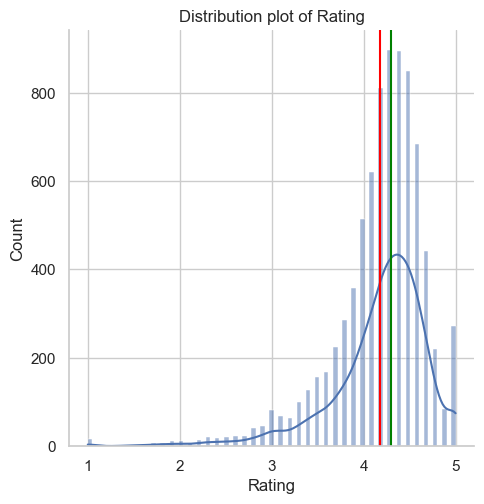

-----------------------------
Five point summary is: 
 count   8196.00000
mean       4.17324
std        0.53662
min        1.00000
25%        4.00000
50%        4.30000
75%        4.50000
max        5.00000
Name: Rating, dtype: float64


In [31]:
num_uni_anal(df, 'Rating')

The ratings are highly left skewed and most of the values are around 4.4. Generally, on Goole Store, we do find such trend. People give the rating highly if the product is free and it serves the purpose. Low ratings are given to particular products only- that are very bad. Let's check the number of downloads of those records which don't have 'Rating' values. I would be careful about giving someone a very high rating with very large userbase, because that is a rare case. Often with an increase in the userbase, we find a decrease in the rating.

In [32]:
# 10 samples from the records for which we do not have any ratings

df[df['Rating'].isna()].sample(10)

,Category,Rating,Reviews,Size,Installs,Price,ContentRating,LastUpdated
10825,SOCIAL,NaN,7,7.7M,100+,0.00000,Teen,"February 2, 2018"
10214,SOCIAL,NaN,4,5.1M,500+,0.00000,Everyone,"December 23, 2017"
9962,HOUSE_AND_HOME,NaN,13,43M,100+,0.00000,Everyone,"April 18, 2018"
9660,BUSINESS,NaN,0,6.3M,10+,0.00000,Everyone,"September 27, 2017"
5289,PERSONALIZATION,NaN,7,4.9M,500+,0.00000,Everyone,"March 14, 2018"
4265,COMMUNICATION,NaN,2,13M,10+,1.99000,Everyone,"May 3, 2017"
185,BOOKS_AND_REFERENCE,NaN,114,7.3M,"100,000+",0.00000,Everyone,"August 7, 2015"
8243,MAPS_AND_NAVIGATION,NaN,9,10M,"1,000+",0.00000,Everyone,"May 21, 2018"
1469,HOUSE_AND_HOME,NaN,12,5.1M,"5,000+",0.00000,Everyone,"July 12, 2018"
10700,COMMUNICATION,NaN,4,16M,"1,000+",0.00000,Everyone,"January 25, 2018"


It appears that most of samples that have missing Rating have a very low number of installs. That is expected. Google does not allow 'Rating' to appear in the case of new apps with very low userbase. Also, whenever an uploader uploads their app, they make sure it has ratings on the higher side by asking their friends and family. So even if they have a very high value, they do not correspond to usual user behavior. So manybe dropping the samples with no Rating would be a good idea.In addition, Rating is out predictive feature. We cannot feed in missing values of this feature with artificial data just like that. We have to drop all the samples with null Rating values.

In [33]:
df = df.dropna(subset=['Rating']) 

Let's check the status of missing values now.

In [34]:
missing_data(df)

               net_missing  %missing
Category                 0   0.00000
Rating                   0   0.00000
Reviews                  0   0.00000
Size                     0   0.00000
Installs                 0   0.00000
Price                    0   0.00000
ContentRating            0   0.00000
LastUpdated              0   0.00000


And thus, we don't have missing values in the dataset anymore. We are done with the missing values.

## EDA and Feature Engineering

My approach is to analyze each feature one by one and take any actions if needed. 

### Installs

In [35]:
df.value_counts('Installs')

Installs
1,000,000+        1415
100,000+          1094
10,000+            987
10,000,000+        937
1,000+             697
5,000,000+         607
500,000+           504
50,000+            457
5,000+             425
100+               303
50,000,000+        202
500+               199
100,000,000+       188
10+                 69
50+                 56
500,000,000+        24
1,000,000,000+      20
5+                   9
1+                   3
dtype: int64

We will use extract operator on the Series, extract the numerical values from the strings and then typecaste them into numerals.

In [36]:
df['Installs'] = df['Installs'].str.extract("([0-9]+)", expand=True).apply(pd.to_numeric)

We do not care about the probability distrbution of features because we are going to depend on Decision Trees and its ensembling versions

### Category

In [37]:
df['Category'].value_counts()

FAMILY                 1608
GAME                    912
TOOLS                   718
FINANCE                 302
PRODUCTIVITY            301
LIFESTYLE               301
PERSONALIZATION         298
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
MAPS_AND_NAVIGATION     118
EDUCATION               118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       64
HOUSE_AND_HOME           62
ART_AND_DESIGN           61
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

These categories have been suggested by Google, and we have to take them as they are. One this is clear now. I am going to LabelEncode data and I will not use Parametric algorithms which tend to rate a data as high or low based on its mathematical value.

### Review

In [38]:
df.Reviews.describe().T

count     8196
unique    5321
top          2
freq        82
Name: Reviews, dtype: object

This feature contains the number of reviews the app has received. But they are in string/object form. We have to convert them into numeric. If we are not able to convert a few into numeric, it would mean that those are non-numeric, and we will get rid of those samples.

In [39]:
df.Reviews = [int(x) for x in df.Reviews]

### Size

- The column 'Size' contains alphanumeric values, handle the non numeric data and convert the column into suitable datatype. (hint: Replace M with 1 million and K with 1 thousand, and drop/impute the entries where size='Varies with device'). 

Size feature contains values of size of the apps.

In [40]:
df['Size'].describe().T

count                   8196
unique                   414
top       Varies with device
freq                    1169
Name: Size, dtype: object

The above statistical summary indicates presence of Alphanumeric values in the Size column. Let's check value counts()

In [41]:
df.Size.head(20)

0      19M
1      14M
2     8.7M
3      25M
4     2.8M
5     5.6M
6      19M
7      29M
8      33M
9     3.1M
10     28M
11     12M
12     20M
13     21M
14     37M
15    2.7M
16    5.5M
17     17M
18     39M
19     31M
Name: Size, dtype: object

A huge number of entries have the value = 'Varies with device'. Rest of the values have either M (MegaByte) or k(KiloByte) in front of a numeric. Let's deal with them one by one. I will convert everything into kilobytes. (kb) We know that 1 MegaByte = 1000 KiloByte So, I will multiply those values we have M in front with 1000.

- Since we have no information, we will impute these values with the average of the rest of the values. 
- That way these devices won't  affect our prediction.

In [42]:
#Now Convert non nemurice value to 'NaN' value
df['Size'][df['Size' ] == 'Varies with devices'] = np.nan
#Now Convert M with Million and K with Thousand
df['Size'] = df.Size.str.replace('M', 'e6')
df['Size'] = df.Size.str.replace('K', 'e3')

#Now Convert to the nemuric value
df['Size'] = pd.to_numeric(df['Size'], errors = 'coerce')
#Replace the "NaN' Value with Mean 
df['Size'] = df['Size'].fillna(df['Size'].mean())

Skewness of Size is: 1.643


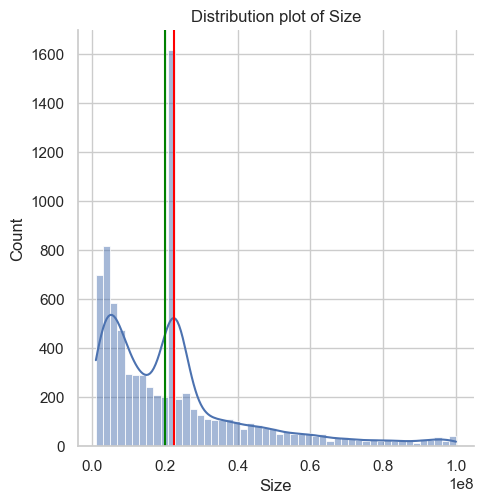

-----------------------------
Five point summary is: 
 count        8196.00000
mean     22560670.50657
std      20689903.50297
min       1000000.00000
25%       6800000.00000
50%      20000000.00000
75%      27000000.00000
max     100000000.00000
Name: Size, dtype: float64


In [43]:
num_uni_anal(df, 'Size')

In [44]:
df.LastUpdated.info()

<class 'pandas.core.series.Series'>
Int64Index: 8196 entries, 0 to 10840
Series name: LastUpdated
Non-Null Count  Dtype 
--------------  ----- 
8196 non-null   object
dtypes: object(1)
memory usage: 128.1+ KB


In [45]:
import time
import datetime

In [46]:
df['LastUpdated'] = pd.to_datetime(df['LastUpdated'])
last_day = df['LastUpdated'].max()
print(last_day)

2018-08-08 00:00:00


In [47]:
# Recency = number of days between the end date and the current date
df['Recency'] = [((last_day - x).days) for x in df['LastUpdated']]

In [48]:
df.drop(columns=['LastUpdated'], inplace = True)

## Data preparation

In [49]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

### Label Encoding the categorical features

In [50]:
cat_feat = ['Category', 'ContentRating']

In [51]:
def label_encode(data,ToBeLabelEncoded):
    le = LabelEncoder()
    for feature in ToBeLabelEncoded:
        data[feature] = le.fit_transform(data[feature])

In [52]:
df.head()

,Category,Rating,Reviews,Size,Installs,Price,ContentRating,Recency
0,ART_AND_DESIGN,4.10000,159,19000000.00000,10,0.00000,Everyone,213
1,ART_AND_DESIGN,3.90000,967,14000000.00000,500,0.00000,Everyone,205
2,ART_AND_DESIGN,4.70000,87510,8700000.00000,5,0.00000,Everyone,7
3,ART_AND_DESIGN,4.50000,215644,25000000.00000,50,0.00000,Teen,61
4,ART_AND_DESIGN,4.30000,967,2800000.00000,100,0.00000,Everyone,49


In [53]:
label_encode(df,cat_feat)

### Scaling the data

In [54]:
scaler = MinMaxScaler(feature_range=(0,1))
columns = df.columns
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df))
df.columns = columns

In [55]:
df.head()

,Category,Rating,Reviews,Size,Installs,Price,ContentRating,Recency
0,0.00000,0.77500,0.00000,0.18182,0.01804,0.00000,0.20000,0.07098
1,0.00000,0.72500,0.00001,0.13131,1.00000,0.00000,0.20000,0.06831
2,0.00000,0.92500,0.00112,0.07778,0.00802,0.00000,0.20000,0.00233
3,0.00000,0.87500,0.00276,0.24242,0.09820,0.00000,0.80000,0.02033
4,0.00000,0.82500,0.00001,0.01818,0.19840,0.00000,0.20000,0.01633


In [56]:
# Getting the Predictors matrix and Prediction Set

X = df.drop('Rating',axis=1)
y = df['Rating']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
## Split the dataset into two parts (i.e. 70% train and 30% test) using random_state=42.
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=42)

### Training a Decision Tree Model

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [60]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_test_pred = dt.predict(X_test)
y_train_pred = dt.predict(X_train)

In [61]:
print("Train Mean Squared Error",mean_squared_error(y_train,y_train_pred))
print("Test Mean Squared Error",mean_squared_error(y_test,y_test_pred))

Train Mean Squared Error 1.5869211550752427e-05
Test Mean Squared Error 0.032432645384302565


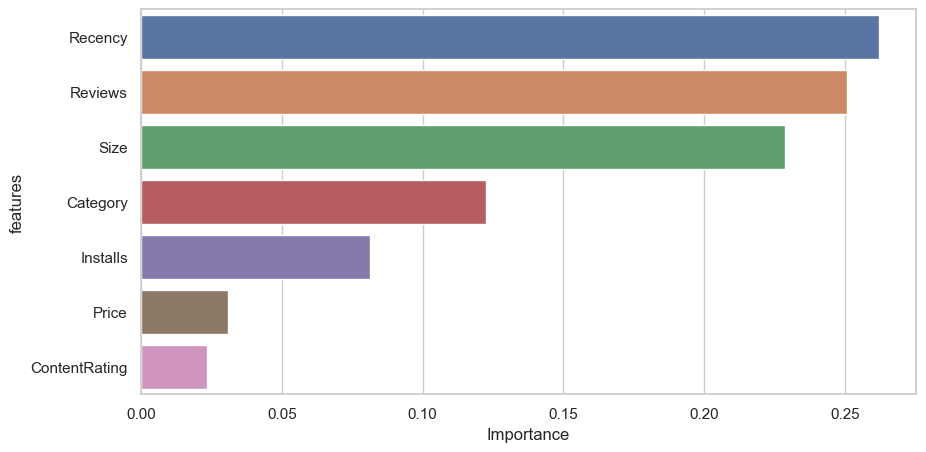

In [62]:
feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': dt.feature_importances_})

feature_importances = feature_importances.sort_values('Importance',ascending=False).reset_index(drop=True)


plt.figure(figsize=(10,5))
sns.barplot(x='Importance',y='features',data=feature_importances)
plt.show()

### Training a Random Forest Model

In [63]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

In [64]:
print("Train Mean Squared Error",mean_squared_error(y_train,y_train_pred))
print("Test Mean Squared Error",mean_squared_error(y_test,y_test_pred))

Train Mean Squared Error 0.002284367621642773
Test Mean Squared Error 0.016444551683180545


### Train an Ada-boost Regressor model 

In [65]:
ada = AdaBoostRegressor(base_estimator=dt, random_state=7, learning_rate=0.1)
ada.fit(X_train,y_train)
y_test_pred = ada.predict(X_test)
y_train_pred = ada.predict(X_train)

In [66]:
print(ada)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.1,
                  random_state=7)


In [67]:
print("Train Mean Squared Error",mean_squared_error(y_train,y_train_pred))
print("Test Mean Squared Error",mean_squared_error(y_test,y_test_pred))

Train Mean Squared Error 1.7498045097127805e-05
Test Mean Squared Error 0.01796926850345669


### Training a Stacking Regressor model

In [68]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression

In [69]:
sr = StackingRegressor(regressors=[LinearRegression(),DecisionTreeRegressor(max_depth=15),AdaBoostRegressor()],
                       meta_regressor = RandomForestRegressor(n_estimators=30))
sr

StackingRegressor(meta_regressor=RandomForestRegressor(n_estimators=30),
                  regressors=[LinearRegression(),
                              DecisionTreeRegressor(max_depth=15),
                              AdaBoostRegressor()])

In [70]:
sr.fit(X_train.values,y_train.values)
y_test_pred = sr.predict(X_test.values)
y_train_pred = sr.predict(X_train.values)

In [71]:
print("Train Mean Squared Error",mean_squared_error(y_train,y_train_pred))
print("Test Mean Squared Error",mean_squared_error(y_test,y_test_pred))

Train Mean Squared Error 0.0011865966616662854
Test Mean Squared Error 0.02769625433278631


In [72]:
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {
           'MSE':make_scorer(mean_squared_error), 
           'MAE':make_scorer(mean_absolute_error)
          }

# Define the models evaluation function
def models_evaluation(X, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    decision_mod = cross_validate(dt, X, y, cv=folds, scoring=scoring)
    rf_mod = cross_validate(rf, X, y, cv=folds, scoring=scoring)
    ada_mod = cross_validate(ada, X, y, cv=folds, scoring=scoring)
    sclf_mod = cross_validate(sr, X.values, y.values, cv=folds, scoring=scoring)

    # Create a data frame with the models performance metrics scores
    models_scores_table = pd.DataFrame(
        {'Decision Tree' : [
                            decision_mod['test_MSE'].mean(),
                            decision_mod['test_MAE'].mean()
                           ],                           
        'Random Forest': [
                           rf_mod['test_MSE'].mean(),
                           rf_mod['test_MAE'].mean()
                         ],  
        'Ada Boost': [ 
                        ada_mod['test_MSE'].mean(),
                        ada_mod['test_MAE'].mean()
                     ],
        'Stacking Classifier' : [
                                sclf_mod['test_MSE'].mean(),
                                sclf_mod['test_MAE'].mean()
                                ]                            
        },
                                      
        index=['MSE', 'MAE'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmin(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
models_evaluation(X_test, y_test, 8)

,Decision Tree,Random Forest,Ada Boost,Stacking Classifier,Best Score
MSE,0.03485,0.01743,0.01892,0.03163,Random Forest
MAE,0.12587,0.09243,0.09170,0.12069,Ada Boost


# Summary

- We tried 4 regression models in their base form without hyperparameter tuning. These are: Decision Tree, Random Forest, Ada Boost and Stacking of of them.
- We found that Ada-boost as well as Random Forest Regressor model is performing well in terms of training and test accuracy of the model. Stacking model was expected to perform better, but may we didn't select a condusive set of base learners. 
- We can see that Ensemble methods can really help in overcoming a model's over-fitting problem.
- With hyperparmater tuning, we can achieve better results.